In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 序列操作，与numpy一维数组类似 Series

In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [3]:
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [4]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [5]:
s + 1000 #广播

0    1002
1     999
2    1003
3    1005
dtype: int64

## 序列增加标签 index，与字典类似

In [6]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [7]:
s2["bob"] #等价于s2.loc["bob"]

83

In [8]:
s2[1] # 等价于s2.iloc[1]

83

In [9]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [10]:
#split操作会保持原来序列标签
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise_slice = surprise[2:]
0 in surprise_slice.index

False

In [11]:
surprise_slice.iloc[0] #等价于surprise_slice.loc[2]

1002

## 通过字典生成序列

In [12]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [13]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

In [14]:
#通过index自动识别
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [15]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

In [16]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

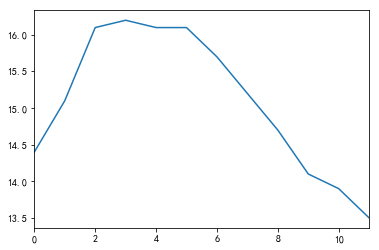

In [17]:
temperatures = [14.4,15.1,16.1,16.2,16.1,16.1,15.7,15.2,14.7,14.1,13.9,13.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

# 时间序列操作

In [18]:
dates = pd.date_range('2018/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2018-10-29 17:30:00', '2018-10-29 18:30:00',
               '2018-10-29 19:30:00', '2018-10-29 20:30:00',
               '2018-10-29 21:30:00', '2018-10-29 22:30:00',
               '2018-10-29 23:30:00', '2018-10-30 00:30:00',
               '2018-10-30 01:30:00', '2018-10-30 02:30:00',
               '2018-10-30 03:30:00', '2018-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
temp_series = pd.Series(temperatures, dates)
temp_series

2018-10-29 17:30:00    14.4
2018-10-29 18:30:00    15.1
2018-10-29 19:30:00    16.1
2018-10-29 20:30:00    16.2
2018-10-29 21:30:00    16.1
2018-10-29 22:30:00    16.1
2018-10-29 23:30:00    15.7
2018-10-30 00:30:00    15.2
2018-10-30 01:30:00    14.7
2018-10-30 02:30:00    14.1
2018-10-30 03:30:00    13.9
2018-10-30 04:30:00    13.5
Freq: H, dtype: float64

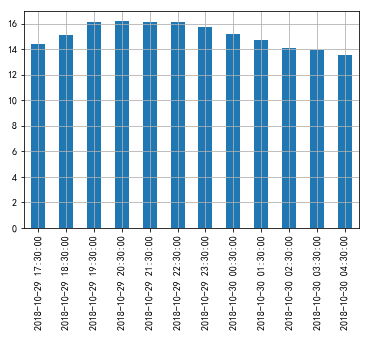

In [20]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

In [21]:
temp_series_freq_2H = temp_series.resample("2H")
print(temp_series_freq_2H,'\n----------------------------------------------') #时间序列重新取样对象
temp_series_freq_2H = temp_series_freq_2H.mean()
print(temp_series_freq_2H)

DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, base=0] 
----------------------------------------------
2018-10-29 16:00:00    14.40
2018-10-29 18:00:00    15.60
2018-10-29 20:00:00    16.15
2018-10-29 22:00:00    15.90
2018-10-30 00:00:00    14.95
2018-10-30 02:00:00    14.00
2018-10-30 04:00:00    13.50
Freq: 2H, dtype: float64


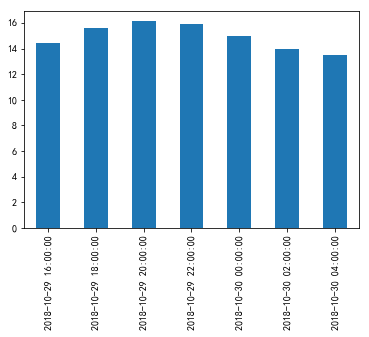

In [22]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

In [23]:
temp_series_freq_2H = temp_series.resample("2H").min() #等价于temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2018-10-29 16:00:00    14.4
2018-10-29 18:00:00    15.1
2018-10-29 20:00:00    16.1
2018-10-29 22:00:00    15.7
2018-10-30 00:00:00    14.7
2018-10-30 02:00:00    13.9
2018-10-30 04:00:00    13.5
Freq: 2H, dtype: float64

## 高精度采样的数据插值

In [24]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

2018-10-29 17:30:00    14.4
2018-10-29 17:45:00     NaN
2018-10-29 18:00:00     NaN
2018-10-29 18:15:00     NaN
2018-10-29 18:30:00    15.1
2018-10-29 18:45:00     NaN
2018-10-29 19:00:00     NaN
2018-10-29 19:15:00     NaN
2018-10-29 19:30:00    16.1
2018-10-29 19:45:00     NaN
Freq: 15T, dtype: float64

In [25]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2018-10-29 17:30:00    14.400000
2018-10-29 17:45:00    14.452911
2018-10-29 18:00:00    14.605113
2018-10-29 18:15:00    14.829758
2018-10-29 18:30:00    15.100000
2018-10-29 18:45:00    15.388992
2018-10-29 19:00:00    15.669887
2018-10-29 19:15:00    15.915839
2018-10-29 19:30:00    16.100000
2018-10-29 19:45:00    16.203621
Freq: 15T, dtype: float64

In [26]:
temp_series_freq_15min_linear = temp_series.resample("15Min").interpolate(method="linear")
temp_series_freq_15min_linear.head(n=10)

2018-10-29 17:30:00    14.400
2018-10-29 17:45:00    14.575
2018-10-29 18:00:00    14.750
2018-10-29 18:15:00    14.925
2018-10-29 18:30:00    15.100
2018-10-29 18:45:00    15.350
2018-10-29 19:00:00    15.600
2018-10-29 19:15:00    15.850
2018-10-29 19:30:00    16.100
2018-10-29 19:45:00    16.125
Freq: 15T, dtype: float64

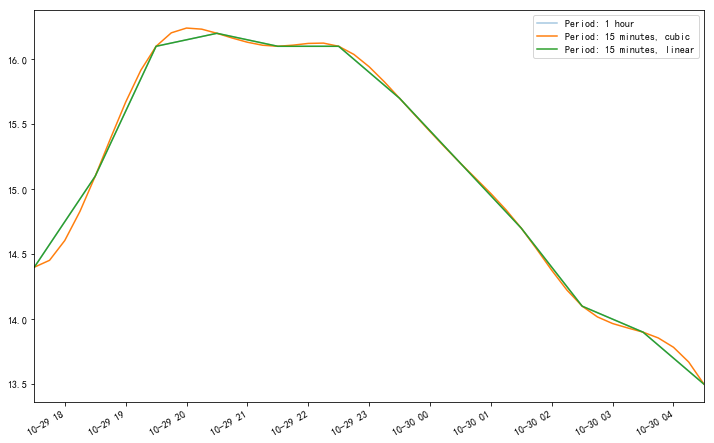

In [27]:
plt.subplots(figsize=(12,8))
temp_series.plot(label="Period: 1 hour",alpha=0.4)
temp_series_freq_15min.plot(label="Period: 15 minutes, cubic")
temp_series_freq_15min_linear.plot(label="Period: 15 minutes, linear")
plt.legend()
plt.show()

## 时区

In [28]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2018-10-29 17:30:00-04:00    14.4
2018-10-29 18:30:00-04:00    15.1
2018-10-29 19:30:00-04:00    16.1
2018-10-29 20:30:00-04:00    16.2
2018-10-29 21:30:00-04:00    16.1
2018-10-29 22:30:00-04:00    16.1
2018-10-29 23:30:00-04:00    15.7
2018-10-30 00:30:00-04:00    15.2
2018-10-30 01:30:00-04:00    14.7
2018-10-30 02:30:00-04:00    14.1
2018-10-30 03:30:00-04:00    13.9
2018-10-30 04:30:00-04:00    13.5
Freq: H, dtype: float64

In [29]:
temp_series_sh = temp_series.tz_localize("Asia/Shanghai")
temp_series_sh

2018-10-29 17:30:00+08:00    14.4
2018-10-29 18:30:00+08:00    15.1
2018-10-29 19:30:00+08:00    16.1
2018-10-29 20:30:00+08:00    16.2
2018-10-29 21:30:00+08:00    16.1
2018-10-29 22:30:00+08:00    16.1
2018-10-29 23:30:00+08:00    15.7
2018-10-30 00:30:00+08:00    15.2
2018-10-30 01:30:00+08:00    14.7
2018-10-30 02:30:00+08:00    14.1
2018-10-30 03:30:00+08:00    13.9
2018-10-30 04:30:00+08:00    13.5
Freq: H, dtype: float64

In [30]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2018-10-29 22:30:00+01:00    14.4
2018-10-29 23:30:00+01:00    15.1
2018-10-30 00:30:00+01:00    16.1
2018-10-30 01:30:00+01:00    16.2
2018-10-30 02:30:00+01:00    16.1
2018-10-30 03:30:00+01:00    16.1
2018-10-30 04:30:00+01:00    15.7
2018-10-30 05:30:00+01:00    15.2
2018-10-30 06:30:00+01:00    14.7
2018-10-30 07:30:00+01:00    14.1
2018-10-30 08:30:00+01:00    13.9
2018-10-30 09:30:00+01:00    13.5
Freq: H, dtype: float64

In [31]:
temp_series_paris_naive = temp_series_paris.tz_localize(None) #删除时区信息
temp_series_paris_naive

2018-10-29 22:30:00    14.4
2018-10-29 23:30:00    15.1
2018-10-30 00:30:00    16.1
2018-10-30 01:30:00    16.2
2018-10-30 02:30:00    16.1
2018-10-30 03:30:00    16.1
2018-10-30 04:30:00    15.7
2018-10-30 05:30:00    15.2
2018-10-30 06:30:00    14.7
2018-10-30 07:30:00    14.1
2018-10-30 08:30:00    13.9
2018-10-30 09:30:00    13.5
Freq: H, dtype: float64

# 季度信息

In [32]:
quarters = pd.period_range('2018Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [33]:
quarters + 3

PeriodIndex(['2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
             '2020Q2', '2020Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [34]:
quarters.asfreq("M") #末尾月份

PeriodIndex(['2018-03', '2018-06', '2018-09', '2018-12', '2019-03', '2019-06',
             '2019-09', '2019-12'],
            dtype='period[M]', freq='M')

In [35]:
quarters.asfreq("M", how="start")

PeriodIndex(['2018-01', '2018-04', '2018-07', '2018-10', '2019-01', '2019-04',
             '2019-07', '2019-10'],
            dtype='period[M]', freq='M')

In [36]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
quarterly_revenue

2018Q1    300
2018Q2    320
2018Q3    290
2018Q4    390
2019Q1    320
2019Q2    360
2019Q3    310
2019Q4    410
Freq: Q-DEC, dtype: int64

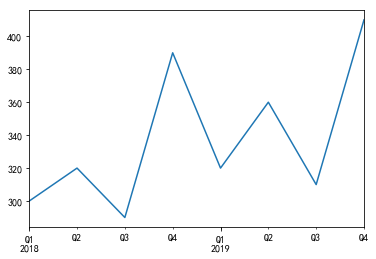

In [37]:
quarterly_revenue.plot(kind="line")
plt.show()

In [38]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2018-03-31 23:59:59.999999999    300
2018-06-30 23:59:59.999999999    320
2018-09-30 23:59:59.999999999    290
2018-12-31 23:59:59.999999999    390
2019-03-31 23:59:59.999999999    320
2019-06-30 23:59:59.999999999    360
2019-09-30 23:59:59.999999999    310
2019-12-31 23:59:59.999999999    410
Freq: Q-DEC, dtype: int64

In [39]:
last_hours.to_period()

2018Q1    300
2018Q2    320
2018Q3    290
2018Q4    390
2019Q1    320
2019Q2    360
2019Q3    310
2019Q4    410
Freq: Q-DEC, dtype: int64

In [40]:
months_2018 = pd.period_range("2018", periods=12, freq="M")
one_day_after_last_days = months_2018.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2018-01-31 09:00', '2018-02-28 09:00', '2018-03-30 09:00',
             '2018-04-30 09:00', '2018-05-31 09:00', '2018-06-29 09:00',
             '2018-07-31 09:00', '2018-08-31 09:00', '2018-09-28 09:00',
             '2018-10-31 09:00', '2018-11-30 09:00', '2018-12-31 09:00'],
            dtype='period[H]', freq='H')

# DataFrame 数据框架！！

In [41]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [42]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [43]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [44]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [45]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [46]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3.0


In [11]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## 字符串操作

In [13]:
people.hobby.str.lower()

alice       biking
bob        dancing
charles        NaN
Name: hobby, dtype: object

In [14]:
people.hobby.str.len()

alice      6.0
bob        7.0
charles    NaN
Name: hobby, dtype: float64

|  method1    |  method2         |   method3        |  method4         |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

## 多标（高维）签数据表

In [48]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

In [49]:
d5["public"]

birthyear    hobby
London charles       1992      NaN
Paris  alice         1985   Biking
       bob           1984  Dancing

In [50]:
d5["public", "hobby"]  # 等价于 d5["public"]["hobby"]

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: (public, hobby), dtype: object

In [51]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
London charles       1992      NaN     112       0.0
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0

In [52]:
d6 = d5.T
d6

London   Paris         
          charles   alice      bob
birthyear    1992    1985     1984
hobby         NaN  Biking  Dancing
weight        112      68       83
children        0     NaN        3

In [53]:
d7 = d6.stack()
d7

London    Paris
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN        3
          charles      0      NaN

In [54]:
d7_0 = d6.stack(level=0)
d7_0

alice      bob charles
birthyear London     NaN      NaN    1992
          Paris     1985     1984     NaN
hobby     Paris   Biking  Dancing     NaN
weight    London     NaN      NaN     112
          Paris       68       83     NaN
children  London     NaN      NaN       0
          Paris      NaN        3     NaN

In [55]:
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN
children     NaN  NaN       0     NaN        3     NaN

In [56]:
d9 = d8.unstack()
d9

London  alice    birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
        bob      birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
        charles  birthyear       1992
                 hobby            NaN
                 weight           112
                 children           0
Paris   alice    birthyear       1985
                 hobby         Biking
                 weight            68
                 children         NaN
        bob      birthyear       1984
                 hobby        Dancing
                 weight            83
                 children           3
        charles  birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
dtype: object

In [57]:
d10 = d9.unstack(level = (0,1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN
children     NaN  NaN       0     NaN        3     NaN

# 数据表的行操作

In [58]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [59]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

In [60]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

In [61]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [62]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [63]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


# 添加或删除列

In [64]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [65]:
people["age"] = 2018 - people["birthyear"]  # 添加列 "age"
people["over 30"] = people["age"] > 30      # 添加列 "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [66]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


In [67]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## 通过assign增加列

In [68]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [69]:
people #assign生成新表，原表不发生变更

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


In [70]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


## 评估表达式

In [71]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

In [72]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,33,True,NaN,22.985398
bob,Dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


In [73]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## 查询方法

In [74]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


## 排序

In [75]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


In [76]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


In [77]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


# 数据表的操作方法

In [186]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [187]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [164]:
grades + 1 #numpy广播方法

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


In [165]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [166]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [167]:
(grades > 5).all() #所有值大于5

sep    False
oct     True
nov    False
dtype: bool

In [168]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [169]:
(grades == 10).any(axis = 1) #任意有值等于10

alice      False
bob         True
charles    False
darwin      True
dtype: bool

In [170]:
grades - grades.mean()  # 数据标准化，更新后均值为0

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [171]:
(grades - grades.mean()).mean()

sep    0.0
oct    0.0
nov    0.0
dtype: float64

In [172]:
grades - grades.values.mean() #根据全局均值标准化数据

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


In [173]:
(grades - grades.values.mean()).values.mean()

0.0

# 多表格的操作

In [8]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),columns=list('BAC'))
print(A,'\n---------------------------')
print(B,'\n---------------------------')
A + B

    A   B
0   6  19
1  14  10 
---------------------------
   B  A  C
0  7  4  6
1  9  2  6
2  7  4  3 
---------------------------


,A,B,C
0,10.0,26.0,NaN
1,16.0,19.0,NaN
2,NaN,NaN,NaN


In [6]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,10.00,26.00,18.25
1,16.00,19.00,18.25
2,16.25,19.25,15.25


| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |

## 自动对齐规则，row index & column

In [174]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [175]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [176]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [177]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [178]:
df = grades + bonus_points
new_order = [3,2,1,0]
df[df.columns[new_order]]

,sep,oct,nov,dec
alice,NaN,NaN,NaN,NaN
bob,NaN,9.0,NaN,NaN
charles,NaN,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,10.0,11.0,NaN


In [179]:
df[df.columns[::-1]]

,sep,oct,nov,dec
alice,NaN,NaN,NaN,NaN
bob,NaN,9.0,NaN,NaN
charles,NaN,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,10.0,11.0,NaN


## 处理缺失值

In [180]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [181]:
fixed_bonus_points = bonus_points.fillna(0)
print(fixed_bonus_points,'\n-------------------------------')
fixed_bonus_points.insert(0, "sep", 0)
print(fixed_bonus_points,'\n-------------------------------')
fixed_bonus_points.loc["alice"] = 0
print(fixed_bonus_points,'\n-------------------------------')
grades + fixed_bonus_points

         oct  nov  dec
bob      0.0  0.0  2.0
colin    0.0  1.0  0.0
darwin   0.0  1.0  0.0
charles  3.0  3.0  0.0 
-------------------------------
         sep  oct  nov  dec
bob        0  0.0  0.0  2.0
colin      0  0.0  1.0  0.0
darwin     0  0.0  1.0  0.0
charles    0  3.0  3.0  0.0 
-------------------------------
         sep  oct  nov  dec
bob        0  0.0  0.0  2.0
colin      0  0.0  1.0  0.0
darwin     0  0.0  1.0  0.0
charles    0  3.0  3.0  0.0
alice      0  0.0  0.0  0.0 
-------------------------------


,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [182]:
print(bonus_points,'\n-------------------------------')
bonus_points.interpolate(axis=1) #线性插入

         oct  nov  dec
bob      0.0  NaN  2.0
colin    NaN  1.0  0.0
darwin   0.0  1.0  0.0
charles  3.0  3.0  0.0 
-------------------------------


,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [183]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
print(better_bonus_points,'\n-------------------------------')
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

         sep  oct  nov  dec
bob        0  0.0  NaN  2.0
colin      0  NaN  1.0  0.0
darwin     0  0.0  1.0  0.0
charles    0  3.0  3.0  0.0
alice      0  0.0  0.0  0.0 
-------------------------------


,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [184]:
grades + better_bonus_points #column顺序整理

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [208]:
better_grades = grades.copy()
better_grades["dec"] = 0
better_grades.loc['colin'] = 0
final_grades_clean = grades + better_bonus_points
print(final_grades_clean,"\n---------------------------")
final_grades = better_grades + better_bonus_points
final_grades

         dec   nov   oct   sep
alice    NaN   9.0   8.0   8.0
bob      NaN  10.0   9.0  10.0
charles  NaN   5.0  11.0   4.0
colin    NaN   NaN   NaN   NaN
darwin   NaN  11.0  10.0   9.0 
---------------------------


,sep,oct,nov,dec
alice,8.0,8.0,9.0,0.0
bob,10.0,9.0,10.0,2.0
charles,4.0,11.0,5.0,0.0
colin,0.0,0.5,1.0,0.0
darwin,9.0,10.0,11.0,0.0


In [209]:
final_grades_clean.dropna(how="all").dropna(axis=1, how="all")

,nov,oct,sep
alice,9.0,8.0,8.0
bob,10.0,9.0,10.0
charles,5.0,11.0,4.0
darwin,11.0,10.0,9.0


## 分组 groupby

In [210]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,0.0,Biking
bob,10.0,9.0,10.0,2.0,Dancing
charles,4.0,11.0,5.0,0.0,NaN
colin,0.0,0.5,1.0,0.0,Dancing
darwin,9.0,10.0,11.0,0.0,Biking


In [211]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades.median() #mean, min, max, median, count, sum

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.00,10.0,0.0
Dancing,5.0,4.75,5.5,1.0


| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

## 透视表 pivot_table

In [212]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [213]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,nov,9.0,NaN
1,alice,oct,8.0,NaN
2,alice,sep,8.0,NaN
3,bob,nov,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,sep,10.0,2.0
6,charles,nov,5.0,3.0
7,charles,oct,11.0,3.0
8,charles,sep,4.0,0.0
9,darwin,nov,11.0,0.0


In [215]:
pd.pivot_table(more_grades, index="name") #自动透视数值型列

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


In [217]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max) #通过aggfunc定义透视方法

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


In [218]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


In [219]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True) #获得多层的透视表

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    0.000  10.00
        oct      NaN   9.00
        sep    2.000  10.00
charles nov    3.000   5.00
        oct    3.000  11.00
        sep    0.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

## 数据表的概览公式，对于大数据表

In [66]:
col_list = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
index_list = np.arange(100,300,2)

In [69]:
test_df = pd.DataFrame(np.zeros((100,26)),columns=col_list,index = index_list)
test_df

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%13*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "ID_n")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,ID_n,99.0,33.0,132.0,110.0,110.0,132.0,...,99.0,33.0,132.0,110.0,110.0,132.0,33.0,99.0,44.0,11.0
1,11.0,22.0,55.0,ID_n,110.0,44.0,NaN,121.0,121.0,NaN,...,110.0,44.0,NaN,121.0,121.0,NaN,44.0,110.0,55.0,22.0
2,22.0,33.0,66.0,ID_n,121.0,55.0,11.0,132.0,132.0,11.0,...,121.0,55.0,11.0,132.0,132.0,11.0,55.0,121.0,66.0,33.0
3,33.0,44.0,77.0,ID_n,132.0,66.0,22.0,NaN,NaN,22.0,...,132.0,66.0,22.0,NaN,NaN,22.0,66.0,132.0,77.0,44.0
4,44.0,55.0,88.0,ID_n,NaN,77.0,33.0,11.0,11.0,33.0,...,NaN,77.0,33.0,11.0,11.0,33.0,77.0,NaN,88.0,55.0
5,55.0,66.0,99.0,ID_n,11.0,88.0,44.0,22.0,22.0,44.0,...,11.0,88.0,44.0,22.0,22.0,44.0,88.0,11.0,99.0,66.0
6,66.0,77.0,110.0,ID_n,22.0,99.0,55.0,33.0,33.0,55.0,...,22.0,99.0,55.0,33.0,33.0,55.0,99.0,22.0,110.0,77.0
7,77.0,88.0,121.0,ID_n,33.0,110.0,66.0,44.0,44.0,66.0,...,33.0,110.0,66.0,44.0,44.0,66.0,110.0,33.0,121.0,88.0
8,88.0,99.0,132.0,ID_n,44.0,121.0,77.0,55.0,55.0,77.0,...,44.0,121.0,77.0,55.0,55.0,77.0,121.0,44.0,132.0,99.0
9,99.0,110.0,NaN,ID_n,55.0,132.0,88.0,66.0,66.0,88.0,...,55.0,132.0,88.0,66.0,66.0,88.0,132.0,55.0,NaN,110.0


In [223]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,ID_n,99.0,33.0,132.0,110.0,110.0,132.0,...,99.0,33.0,132.0,110.0,110.0,132.0,33.0,99.0,44.0,11.0
1,11.0,22.0,55.0,ID_n,110.0,44.0,NaN,121.0,121.0,NaN,...,110.0,44.0,NaN,121.0,121.0,NaN,44.0,110.0,55.0,22.0
2,22.0,33.0,66.0,ID_n,121.0,55.0,11.0,132.0,132.0,11.0,...,121.0,55.0,11.0,132.0,132.0,11.0,55.0,121.0,66.0,33.0
3,33.0,44.0,77.0,ID_n,132.0,66.0,22.0,NaN,NaN,22.0,...,132.0,66.0,22.0,NaN,NaN,22.0,66.0,132.0,77.0,44.0
4,44.0,55.0,88.0,ID_n,NaN,77.0,33.0,11.0,11.0,33.0,...,NaN,77.0,33.0,11.0,11.0,33.0,77.0,NaN,88.0,55.0


In [224]:
large_df.tail(3)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9997,NaN,11.0,44.0,ID_n,99.0,33.0,132.0,110.0,110.0,132.0,...,99.0,33.0,132.0,110.0,110.0,132.0,33.0,99.0,44.0,11.0
9998,11.0,22.0,55.0,ID_n,110.0,44.0,NaN,121.0,121.0,NaN,...,110.0,44.0,NaN,121.0,121.0,NaN,44.0,110.0,55.0,22.0
9999,22.0,33.0,66.0,ID_n,121.0,55.0,11.0,132.0,132.0,11.0,...,121.0,55.0,11.0,132.0,132.0,11.0,55.0,121.0,66.0,33.0


In [225]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            9230 non-null float64
B            9231 non-null float64
C            9231 non-null float64
some_text    10000 non-null object
D            9231 non-null float64
E            9231 non-null float64
F            9230 non-null float64
G            9231 non-null float64
H            9231 non-null float64
I            9230 non-null float64
J            9231 non-null float64
K            9231 non-null float64
L            9231 non-null float64
M            9231 non-null float64
N            9230 non-null float64
O            9231 non-null float64
P            9231 non-null float64
Q            9231 non-null float64
R            9231 non-null float64
S            9230 non-null float64
T            9231 non-null float64
U            9231 non-null float64
V            9230 non-null float64
W            9231 non-null float64
X            9231 non-null float64
Y            9231

In [226]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,9230.000000,9231.000000,9231.000000,9231.000000,9231.000000,9230.000000,9231.000000,9231.000000,9230.000000,9231.000000,...,9231.000000,9231.000000,9230.000000,9231.000000,9231.000000,9230.000000,9231.000000,9231.000000,9231.000000,9231.000000
mean,71.488082,71.483913,71.494638,71.512512,71.491063,71.500000,71.516087,71.516087,71.500000,71.491063,...,71.512512,71.491063,71.500000,71.516087,71.516087,71.500000,71.491063,71.512512,71.494638,71.483913
std,37.979236,37.979292,37.969974,37.975151,37.972045,37.980964,37.979292,37.979292,37.980964,37.972045,...,37.975151,37.972045,37.980964,37.979292,37.979292,37.980964,37.972045,37.975151,37.969974,37.979292
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,33.000000,33.000000,44.000000,44.000000,38.500000,35.750000,44.000000,44.000000,35.750000,38.500000,...,44.000000,38.500000,35.750000,44.000000,44.000000,35.750000,38.500000,44.000000,44.000000,33.000000
50%,66.000000,66.000000,66.000000,77.000000,66.000000,71.500000,77.000000,77.000000,71.500000,66.000000,...,77.000000,66.000000,71.500000,77.000000,77.000000,71.500000,66.000000,77.000000,66.000000,66.000000
75%,99.000000,99.000000,99.000000,110.000000,99.000000,107.250000,110.000000,110.000000,107.250000,99.000000,...,110.000000,99.000000,107.250000,110.000000,110.000000,107.250000,99.000000,110.000000,99.000000,99.000000
max,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000


## 保存&加载

In [230]:
large_df.head().to_csv("data/large_df.csv")
large_df.head().to_html("data/large_df.html")
large_df.head().to_json("data/large_df.json")

In [231]:
for filename in ("data/large_df.csv", "data/large_df.html", "data/large_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# data/large_df.csv
,A,B,C,some_text,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,,11.0,44.0,ID_n,99.0,33.0,132.0,110.0,110.0,132.0,33.0,99.0,44.0,11.0,,11.0,44.0,99.0,33.0,132.0,110.0,110.0,132.0,33.0,99.0,44.0,11.0
1,11.0,22.0,55.0,ID_n,110.0,44.0,,121.0,121.0,,44.0,110.0,55.0,22.0,11.0,22.0,55.0,110.0,44.0,,121.0,121.0,,44.0,110.0,55.0,22.0
2,22.0,33.0,66.0,ID_n,121.0,55.0,11.0,132.0,132.0,11.0,55.0,121.0,66.0,33.0,22.0,33.0,66.0,121.0,55.0,11.0,132.0,132.0,11.0,55.0,121.0,66.0,33.0
3,33.0,44.0,77.0,ID_n,132.0,66.0,22.0,,,22.0,66.0,132.0,77.0,44.0,33.0,44.0,77.0,132.0,66.0,22.0,,,22.0,66.0,132.0,77.0,44.0
4,44.0,55.0,88.0,ID_n,,77.0,33.0,11.0,11.0,33.0,77.0,,88.0,55.0,44.0,55.0,88.0,,77.0,33.0,11.0,11.0,33.0,77.0,,88.0,55.0


# data/large_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>A</th>
      <th>B</th>
      <th>C</th>
      <th>some_text</th>
      <th>D</th>
      <th>E</th>
      <th>F</th>
      <th>G

In [232]:
large_df.head().to_excel("data/large_df.xlsx", sheet_name='large')

In [233]:
with pd.ExcelWriter('data/large_df_2.xlsx') as writer:  # doctest: +SKIP
    large_df.to_excel(writer, sheet_name='df')

In [234]:
large_df_loaded = pd.read_csv("data/large_df.csv", index_col=0)
large_df_loaded

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,ID_n,99.0,33.0,132.0,110.0,110.0,132.0,...,99.0,33.0,132.0,110.0,110.0,132.0,33.0,99.0,44.0,11.0
1,11.0,22.0,55.0,ID_n,110.0,44.0,NaN,121.0,121.0,NaN,...,110.0,44.0,NaN,121.0,121.0,NaN,44.0,110.0,55.0,22.0
2,22.0,33.0,66.0,ID_n,121.0,55.0,11.0,132.0,132.0,11.0,...,121.0,55.0,11.0,132.0,132.0,11.0,55.0,121.0,66.0,33.0
3,33.0,44.0,77.0,ID_n,132.0,66.0,22.0,NaN,NaN,22.0,...,132.0,66.0,22.0,NaN,NaN,22.0,66.0,132.0,77.0,44.0
4,44.0,55.0,88.0,ID_n,NaN,77.0,33.0,11.0,11.0,33.0,...,NaN,77.0,33.0,11.0,11.0,33.0,77.0,NaN,88.0,55.0


In [236]:
large_df_loaded = pd.read_json("data/large_df.json")
large_df_loaded

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11,44,ID_n,99.0,33,132.0,110.0,110.0,132.0,...,99.0,33,132.0,110.0,110.0,132.0,33,99.0,44,11
1,11.0,22,55,ID_n,110.0,44,NaN,121.0,121.0,NaN,...,110.0,44,NaN,121.0,121.0,NaN,44,110.0,55,22
2,22.0,33,66,ID_n,121.0,55,11.0,132.0,132.0,11.0,...,121.0,55,11.0,132.0,132.0,11.0,55,121.0,66,33
3,33.0,44,77,ID_n,132.0,66,22.0,NaN,NaN,22.0,...,132.0,66,22.0,NaN,NaN,22.0,66,132.0,77,44
4,44.0,55,88,ID_n,NaN,77,33.0,11.0,11.0,33.0,...,NaN,77,33.0,11.0,11.0,33.0,77,NaN,88,55


In [247]:
csv_url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv"
us_cities = pd.read_csv(csv_url,sep='	')
us_cities.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 合并组合数据表

In [15]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [16]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [17]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


In [18]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


In [19]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


In [20]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
print(city_pop2,"\n------------------------------------------------")
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

   population           name       state
3      808976  San Francisco  California
4     8363710       New York    New-York
5      413201          Miami     Florida
6     2242193        Houston       Texas 
------------------------------------------------


,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## 连结，堆叠数据表

In [21]:
result_concat = pd.concat([city_loc, city_pop],sort=True)
result_concat

,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas


In [22]:
result_concat.loc[3]

,city,lat,lng,population,state
3,Cleveland,41.473508,-81.739791,NaN,OH
3,San Francisco,NaN,NaN,808976.0,California


In [23]:
pd.concat([city_loc, city_pop], ignore_index=True,sort=False)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


In [24]:
pd.concat([city_loc, city_pop], join="inner",sort=False)

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


In [25]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In [34]:
final_concat = pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1,sort=False)
final_concat

,state,lat,lng,population,state
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


In [27]:
city_loc.append(city_pop,sort=False)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


## 便捷工具

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

In [36]:
final_concat

,state,lat,lng,population,state
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


In [37]:
final_concat.index.str[0:3]

Index(['San', 'New', 'Mia', 'Cle', 'Sal', 'Hou'], dtype='object')

In [38]:
final_concat.index.str.split().str.get(-1)

Index(['Francisco', 'York', 'Miami', 'Cleveland', 'City', 'Houston'], dtype='object')

In [39]:
final_concat['info'] = ['B|C|D', 'B|D', 'A|C','B|D', 'B|C', 'B|C|D']
final_concat

,state,lat,lng,population,state,info
San Francisco,CA,37.781334,-122.416728,808976.0,California,B|C|D
New York,NY,40.705649,-74.008344,8363710.0,New-York,B|D
Miami,FL,25.791100,-80.320733,413201.0,Florida,A|C
Cleveland,OH,41.473508,-81.739791,NaN,NaN,B|D
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN,B|C
Houston,NaN,NaN,NaN,2242193.0,Texas,B|C|D


In [45]:
final_concat['info'].str.get_dummies('|')

,A,B,C,D
San Francisco,0,1,1,1
New York,0,1,0,1
Miami,1,0,1,0
Cleveland,0,1,0,1
Salt Lake City,0,1,1,0
Houston,0,1,1,1


## 类别型列处理方法

In [271]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


In [272]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories

Int64Index([17, 20, 34], dtype='int64')

In [273]:
city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


In [274]:
city_eco.sort_values(by="economy", ascending=False)

,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
4,8363710,New York,New-York,17,Finance
3,808976,San Francisco,California,17,Finance
